In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from typing import List
import numpy as np
import pandas as pd

import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from gaussian_model import LinearKernel, ConstantKernel
from gaussian_model import ExponentialKernel, PeriodicKernel
from gaussian_model import WhiteNoiseKernel, GaussKernel
from gaussian_model import LogGaussKernel
from gaussian_model import Gaussian_Process_Regression

from sklearn.gaussian_process import kernels
from sklearn.gaussian_process import GaussianProcessRegressor

%matplotlib inline
%matplotlib ipympl

ite:1  Abs Err:60.51240968982035  x_new:(np.float64(0.25345399201138763), np.float64(0.07131526274293751), np.float64(0.6488637025973643), np.float64(0.2824213387714442))
ite:101  Abs Err:66.13384418194023  x_new:(np.float64(0.2511832419675563), np.float64(0.07067633362324108), np.float64(0.6430503900138025), np.float64(0.28246643418118145))
ite:201  Abs Err:65.56743120524376  x_new:(np.float64(0.25110696351893264), np.float64(0.07086031265832976), np.float64(0.6428574201719529), np.float64(0.28246073189477805))
ite:301  Abs Err:64.50455622370427  x_new:(np.float64(0.251150944587596), np.float64(0.07111403992264445), np.float64(0.6429647508776406), np.float64(0.28246200470887006))
ite:401  Abs Err:63.55914610236244  x_new:(np.float64(0.25119660814431427), np.float64(0.07135499743680522), np.float64(0.6430734419491222), np.float64(0.28246101101077914))
ite:501  Abs Err:62.76282954273587  x_new:(np.float64(0.2512426946230806), np.float64(0.0715702354983514), np.float64(0.6431818436573095

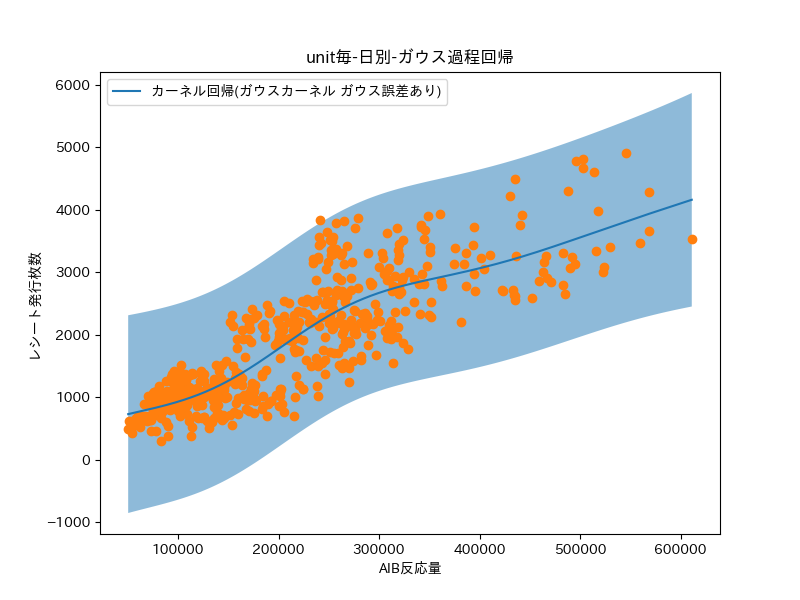

In [3]:
pdf_olympic = pd.read_csv('test_data/ガウス過程回帰_TRAIN_DATA(unit毎-日別-ALLBeacon).csv', header=0, index_col=False)
pdf_olympic = pdf_olympic.drop_duplicates(subset=['aib_count', 'レシート枚数'])
train_data  = [[row['aib_count'], row['レシート枚数']] for _, row in pdf_olympic.iterrows()]
train_data  = np.array(train_data)

x_data = np.array(train_data)[:, 0].reshape(-1, 1)
y_data = np.array(train_data)[:, 1].reshape(-1, 1)


kernel = LinearKernel(alpha=1)          \
         + GaussKernel(alpha=1, beta=1) \
         + WhiteNoiseKernel(alpha=1)
model  = Gaussian_Process_Regression(
    		x_data, 
            y_data,
            kernel=kernel, 
            norm_α=10, 
            l1_ratio=0.1, 
            eta=1e-5, 
            tol=1e-6, 
            max_iterate=15000)

thetas = (np.float64(0.25347680287066865),
		np.float64(0.07132168111658437),
		np.float64(0.6489221003305979),
		np.float64(0.2824288544230671))
model.kernel.set_theta(thetas)

# solver = "external library"
# solver = "ISTA"
solver = "OPTIMIZER"
model.fit(solver=solver, useRAdam=False)

x_test    = np.arange(x_data.min(), x_data.max(), 100)
pred_mean, pred_std = model.predict(x_test.reshape((-1, 1)), return_std=True)
pred_mean = pred_mean.reshape(-1)

# データを描画
plt.figure(figsize=(8, 6))
plt.plot(x_test, pred_mean, label='カーネル回帰(ガウスカーネル ガウス誤差あり)')
plt.fill_between(x_test, pred_mean - 3*pred_std, pred_mean + 3*pred_std, alpha=0.5)
plt.scatter(x_data, y_data, marker='o')
plt.title('unit毎-日別-ガウス過程回帰')
plt.xlabel('AIB反応量')
plt.ylabel('レシート発行枚数')
plt.legend()
plt.show()

In [4]:
model.kernel.get_theta()

(np.float64(0.2535414764577774),
 np.float64(0.07128920295592509),
 np.float64(0.649254258693432),
 np.float64(0.2824275522290407))